In [0]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 70kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=5074a08e27d5c121f17dd8e901603aec4846e5a9a0ebf10f7e89427d784d761c
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
!pip install lime

     |████████████████████████████████| 276kB 2.8MB/s 
     |████████████████████████████████| 2.0MB 4.9MB/s 
  Created wheel for lime: filename=lime-0.2.0.0-cp36-none-any.whl size=284181 sha256=c585ccac717bf3f88a23968e3a8cd528cfc400c4dfa3684777a71debff6eb4dd
  Stored in directory: /root/.cache/pip/wheels/22/f2/ec/e5ebd07348b2b1ac722e91c2f549fcc220f7d5f25497a61232
Successfully built lime
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [0]:
# Load calculation and visulization library
import numpy as np
import pandas as pd
from pandas import set_option
from numpy import arange

import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# ML library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier #Boosting
from sklearn.ensemble import GradientBoostingClassifier #Boosting
from sklearn.ensemble import RandomForestClassifier #Bagging
from sklearn.ensemble import ExtraTreesClassifier #Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier # Boosting
import lightgbm as lgb
from lightgbm import LGBMClassifier #Boosting
#from tpot import TPOTClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



* 3.age
* 4.sex (1 = male; 0 = female))
* 9.chest pain type (4 values) - cp 
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
* 10.resting blood pressure - trestbps
* 12.serum cholestoral in mg/dl - chol
* 16.fasting blood sugar ((fasting blood sugar > 120 mg/dl) (1 = true; 0 = false))- fbs
* 19.resting electrocardiographic results (values 0,1,2) - restecg
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* 32.maximum heart rate achieved - thalach
* 38.exercise induced angina - exang  (1 = yes; 0 = no)
* 40.oldpeak = ST depression induced by exercise relative to rest - oldpeak
* 41.the slope of the peak exercise ST segment - slope
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* 44.number of major vessels (0-3) colored by flourosopy - ca
* 51.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect - thai
* 58.target: 1: yes, 0: No
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [0]:
#Load data set:
df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
#df=pd.read_csv('https://raw.githubusercontent.com/drujensen/heart-disease/master/data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting electrocardiographic', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting electrocardiographic',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [0]:
df.dtypes

age                               int64
sex                               int64
chest_pain_type                   int64
resting_blood_pressure            int64
cholesterol                       int64
fasting_blood_sugar               int64
resting electrocardiographic      int64
max_heart_rate_achieved           int64
exercise_induced_angina           int64
st_depression                   float64
st_slope                          int64
num_major_vessels                 int64
thalassemia                       int64
target                            int64
dtype: object

In [0]:
dt=df.copy()

In [0]:
# May be no need to one hot encoder all these data below, because 

# This is Nominal data, need to be one hot encoder
dt['sex'] = dt['sex'].astype('object') #Nominal
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object') #Nominal
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object') #Nominal
dt['resting electrocardiographic'] = dt['resting electrocardiographic'].astype('object') #Nominal
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object') #Nominal
dt['st_slope'] = dt['st_slope'].astype('object') #Nominal
dt['thalassemia'] = dt['thalassemia'].astype('object') #Nominal

# This is Ordinal data, no need to be one hot encoder

#dt['num_major_vessels'] = dt['num_major_vessels'].astype('object') # Ordinal

# all need to be standar scaller

In [0]:
print(dt.shape)
dt.dtypes

(303, 14)


age                               int64
sex                              object
chest_pain_type                  object
resting_blood_pressure            int64
cholesterol                       int64
fasting_blood_sugar              object
resting electrocardiographic     object
max_heart_rate_achieved           int64
exercise_induced_angina          object
st_depression                   float64
st_slope                         object
num_major_vessels                 int64
thalassemia                      object
target                            int64
dtype: object

In [0]:
dt.isnull().sum()

age                             0
sex                             0
chest_pain_type                 0
resting_blood_pressure          0
cholesterol                     0
fasting_blood_sugar             0
resting electrocardiographic    0
max_heart_rate_achieved         0
exercise_induced_angina         0
st_depression                   0
st_slope                        0
num_major_vessels               0
thalassemia                     0
target                          0
dtype: int64

In [0]:
for name in dt.select_dtypes(include=['object']).columns:
  print(dt[name].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64
0    258
1     45
Name: fasting_blood_sugar, dtype: int64
1    152
0    147
2      4
Name: resting electrocardiographic, dtype: int64
0    204
1     99
Name: exercise_induced_angina, dtype: int64
2    142
1    140
0     21
Name: st_slope, dtype: int64
2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64


### Train test split apply with shuffle y column: must remove all row with column value < 4 

Note: if value_counts <4: cannot split straify with test size = 0.2. We will remove all row with column value < 4 

In [0]:
v = dt.select_dtypes(include=['object'])
dt_new=dt[v.replace(v.apply(pd.Series.value_counts)).gt(3).all(1)]
print(dt_new.shape)

(301, 14)


In [0]:
dt_new.dtypes

age                               int64
sex                              object
chest_pain_type                  object
resting_blood_pressure            int64
cholesterol                       int64
fasting_blood_sugar              object
resting electrocardiographic     object
max_heart_rate_achieved           int64
exercise_induced_angina          object
st_depression                   float64
st_slope                         object
num_major_vessels                 int64
thalassemia                      object
target                            int64
dtype: object

In [0]:
X = dt_new.drop('target',axis=1)
y = dt_new['target']

In [0]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    #shuffle=True ,
                                                    stratify=y,random_state=123)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(240, 13)
(61, 13)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3


In [0]:
X_train['resting electrocardiographic'].value_counts()

1    119
0    119
2      2
Name: resting electrocardiographic, dtype: int64

In [0]:
X_test['resting electrocardiographic'].value_counts()

1    32
0    27
2     2
Name: resting electrocardiographic, dtype: int64

In [0]:
X_train['thalassemia'].value_counts()

2    130
3     95
1     15
Name: thalassemia, dtype: int64

In [0]:
X_test['thalassemia'].value_counts()

2    36
3    22
1     3
Name: thalassemia, dtype: int64

### Columntransformer (run till here)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector

#Standard scaler all numeric value
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

#One hot encoder all category value
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_features = X.select_dtypes(include=['object']).columns

transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categoric', categorical_transformer, categorical_features),
    #('numeric', numeric_transformer, selector(dtype_exclude="object")),
    #('categoric', categorical_transformer, selector(dtype_include="object")),
    #('imputer', imputer_transformer, numeric_features),
    
]
preprocessor = ColumnTransformer(transformers)

Keep Track of Column Labels after transforming

In [0]:
# Create transform X value
X_test_tran=preprocessor.fit_transform(X_test)
X_train_tran=preprocessor.fit_transform(X_train)

print(X_train_tran.shape) # Shape 16 , thêm 4 mặc dù 5category transform do không tính 1 feature chính nó
temp_df=pd.DataFrame(X_train_tran)
temp_df.head()

(240, 25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.613698,1.038463,-0.076199,0.953134,-0.116249,-0.69768,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.048268,-0.004830,0.911222,0.412349,-0.888858,0.33592,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.165336,-0.700359,-1.372190,-0.443895,-0.545476,-0.69768,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.489579,-0.700359,-0.508196,0.367283,0.484669,-0.69768,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.372201,-0.700359,-0.076199,1.989639,-0.202095,-0.69768,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [0]:
# Keep track transformer colum names:
def get_transformer_feature_names(columnTransformer): #mean: preprocessor 

    output_features = []

    for name, pipe, features in columnTransformer.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)

    return output_features
print(len(get_transformer_feature_names(preprocessor)))
get_transformer_feature_names(preprocessor)

25


['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'sex_0',
 'sex_1',
 'chest_pain_type_0',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'fasting_blood_sugar_0',
 'fasting_blood_sugar_1',
 'resting electrocardiographic_0',
 'resting electrocardiographic_1',
 'resting electrocardiographic_2',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'st_slope_0',
 'st_slope_1',
 'st_slope_2',
 'thalassemia_1',
 'thalassemia_2',
 'thalassemia_3']

In [0]:
#Apply name to X_train and X_test after transformer
X_train_tran_df=pd.DataFrame(X_train_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_test_tran_df=pd.DataFrame(X_test_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_train_tran_df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting electrocardiographic_0,resting electrocardiographic_1,resting electrocardiographic_2,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_0,st_slope_1,st_slope_2,thalassemia_1,thalassemia_2,thalassemia_3
0,0.613698,1.038463,-0.076199,0.953134,-0.116249,-0.69768,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.048268,-0.004830,0.911222,0.412349,-0.888858,0.33592,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.165336,-0.700359,-1.372190,-0.443895,-0.545476,-0.69768,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.489579,-0.700359,-0.508196,0.367283,0.484669,-0.69768,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.372201,-0.700359,-0.076199,1.989639,-0.202095,-0.69768,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Spot checking different models

Cross val score

In [0]:
# Creating a list of the classifiers
classifiers = {
    'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(),
    'NB':GaussianNB(),
    'SVC':SVC(),
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging
    'AB':AdaBoostClassifier(),  #Boosting
    'GBM':GradientBoostingClassifier(), #Boosting
    'ET':ExtraTreesClassifier(), #Bagging
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New
    'LGBM':LGBMClassifier(), #New
    
}

In [0]:
import time
num_folds = 5
seed = 7
scoring = 'accuracy'

results = []
names = []
time_=[]
cv_results_mean=[]
cv_results_std=[]


for name, model in classifiers.items():
  #print(name)
  start = time.time()
  estimator = Pipeline(steps=[('preprocessor', preprocessor),
                        # ('dimred', PCA(n_components=8)),
                           ('classifier',model)])
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(estimator, X_train, y_train, cv=kfold, scoring=scoring)

  results.append(cv_results) # array of values
  names.append(name)
  cv_results_mean.append(cv_results.mean()) # one values
  cv_results_std.append(cv_results.std()) # one values

  print("%s: Accuracy: %0.2f (+/- %0.2f)" % (name, cv_results.mean(), cv_results.std() * 2))
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  time_.append(time_cal)

KNN: Accuracy: 0.83 (+/- 0.09)
time : 0.095 

LR: Accuracy: 0.84 (+/- 0.10)
time : 0.126 

LDA: Accuracy: 0.83 (+/- 0.08)
time : 0.107 

CART: Accuracy: 0.75 (+/- 0.05)
time : 0.085 

NB: Accuracy: 0.81 (+/- 0.11)
time : 0.075 

SVC: Accuracy: 0.84 (+/- 0.05)
time : 0.087 

RF: Accuracy: 0.82 (+/- 0.02)
time : 0.808 

AB: Accuracy: 0.79 (+/- 0.12)
time : 0.491 

GBM: Accuracy: 0.80 (+/- 0.12)
time : 0.533 

ET: Accuracy: 0.81 (+/- 0.04)
time : 0.616 

XGB: Accuracy: 0.81 (+/- 0.11)
time : 0.302 

LGBM: Accuracy: 0.80 (+/- 0.10)
time : 0.156 



In [0]:
df_results=pd.DataFrame(list(zip(names,cv_results_mean,cv_results_std,time_)),
                  columns=['Names','CV_mean','CV_std','Time'])
df_results=df_results.sort_values(by='CV_mean',ascending=False)
df_results

,Names,CV_mean,CV_std,Time
5,SVC,0.841667,0.025000,0.086948
1,LR,0.837500,0.048233,0.126196
2,LDA,0.833333,0.041667,0.106839
0,KNN,0.829167,0.044488,0.095346
6,RF,0.816667,0.008333,0.808056
4,NB,0.808333,0.054962,0.074764
9,ET,0.808333,0.020412,0.615977
10,XGB,0.808333,0.054962,0.302460
11,LGBM,0.804167,0.048591,0.156067
8,GBM,0.795833,0.058035,0.533407


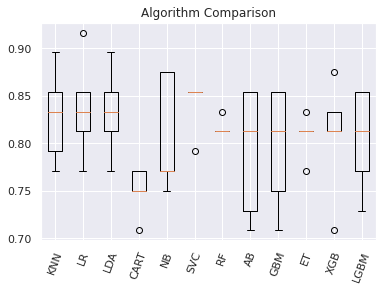

In [0]:
# Compare Algorithms
fig,ax = plt.subplots()
plt.title('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names,rotation=70)
plt.show()

Cross Validate (multy score) for classification

In [0]:
#Cross validate
import time
num_folds = 5
seed = 7
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}


names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  start=time.time()
  estimator = Pipeline(steps=[('preprocessor', preprocessor),
                     # ('dimred', PCA(n_components=8)),
                           ('classifier',model)])
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True)

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_acc'].mean())
  train_rec_macro.append(cv_results['train_rec_macro'].mean())
  train_prec_macro.append(cv_results['train_prec_macro'].mean())
  test_acc.append( cv_results['test_acc'].mean())
  test_rec_macro.append(cv_results['test_rec_macro'].mean())
  test_prec_macro.append(cv_results['test_prec_macro'].mean())
  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_acc'].mean(),cv_results['train_rec_macro'].mean(),cv_results['train_prec_macro'].mean(),
       cv_results['test_acc'].mean(),cv_results['test_rec_macro'].mean(),cv_results['test_prec_macro'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


time : 0.174 

KNN: train_acc: 0.88 train_rec_macro: 0.88 train_prec_macro: 0.88   test_acc: 0.83 test_rec_macro: 0.83 test_prec_macro: 0.83   fit_time: 0.01
time : 0.163 

LR: train_acc: 0.87 train_rec_macro: 0.87 train_prec_macro: 0.87   test_acc: 0.84 test_rec_macro: 0.84 test_prec_macro: 0.84   fit_time: 0.02
time : 0.146 

LDA: train_acc: 0.87 train_rec_macro: 0.87 train_prec_macro: 0.87   test_acc: 0.83 test_rec_macro: 0.83 test_prec_macro: 0.84   fit_time: 0.01
time : 0.121 

CART: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.75 test_rec_macro: 0.74 test_prec_macro: 0.75   fit_time: 0.01
time : 0.122 

NB: train_acc: 0.81 train_rec_macro: 0.81 train_prec_macro: 0.82   test_acc: 0.81 test_rec_macro: 0.81 test_prec_macro: 0.82   fit_time: 0.01
time : 0.136 

SVC: train_acc: 0.92 train_rec_macro: 0.92 train_prec_macro: 0.92   test_acc: 0.84 test_rec_macro: 0.84 test_prec_macro: 0.85   fit_time: 0.01
time : 0.895 

RF: train_acc: 1.00 train_rec_macro: 1

In [0]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,
                                     train_acc,train_rec_macro,train_prec_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro',
                           'train_acc','train_rec_macro','train_prec_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_acc',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,train_acc,train_rec_macro,train_prec_macro,fit_time,time
5,SVC,0.841667,0.837683,0.845353,0.918750,0.915741,0.920998,0.010812,0.136446
1,LR,0.837500,0.835594,0.840237,0.869792,0.866453,0.870734,0.017087,0.163129
2,LDA,0.833333,0.830349,0.836331,0.870833,0.867222,0.872432,0.013814,0.145793
0,KNN,0.829167,0.825445,0.832447,0.878125,0.876775,0.877504,0.009729,0.174498
6,RF,0.820833,0.822233,0.822664,1.000000,1.000000,1.000000,0.145547,0.895275
9,ET,0.816667,0.814173,0.821109,1.000000,1.000000,1.000000,0.106195,0.702486
4,NB,0.808333,0.807829,0.821227,0.806250,0.806115,0.824858,0.009784,0.122448
10,XGB,0.808333,0.804333,0.811283,0.992708,0.992164,0.993190,0.036175,0.259519
11,LGBM,0.804167,0.800629,0.807211,1.000000,1.000000,1.000000,0.022618,0.192650
8,GBM,0.800000,0.796152,0.805754,1.000000,1.000000,1.000000,0.091459,0.538590


In [0]:
df_results_val=df_results_val.sort_values(by='test_rec_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,train_acc,train_rec_macro,train_prec_macro,fit_time,time
5,SVC,0.841667,0.837683,0.845353,0.918750,0.915741,0.920998,0.010812,0.136446
1,LR,0.837500,0.835594,0.840237,0.869792,0.866453,0.870734,0.017087,0.163129
2,LDA,0.833333,0.830349,0.836331,0.870833,0.867222,0.872432,0.013814,0.145793
0,KNN,0.829167,0.825445,0.832447,0.878125,0.876775,0.877504,0.009729,0.174498
6,RF,0.820833,0.822233,0.822664,1.000000,1.000000,1.000000,0.145547,0.895275
9,ET,0.816667,0.814173,0.821109,1.000000,1.000000,1.000000,0.106195,0.702486
4,NB,0.808333,0.807829,0.821227,0.806250,0.806115,0.824858,0.009784,0.122448
10,XGB,0.808333,0.804333,0.811283,0.992708,0.992164,0.993190,0.036175,0.259519
11,LGBM,0.804167,0.800629,0.807211,1.000000,1.000000,1.000000,0.022618,0.192650
8,GBM,0.800000,0.796152,0.805754,1.000000,1.000000,1.000000,0.091459,0.538590


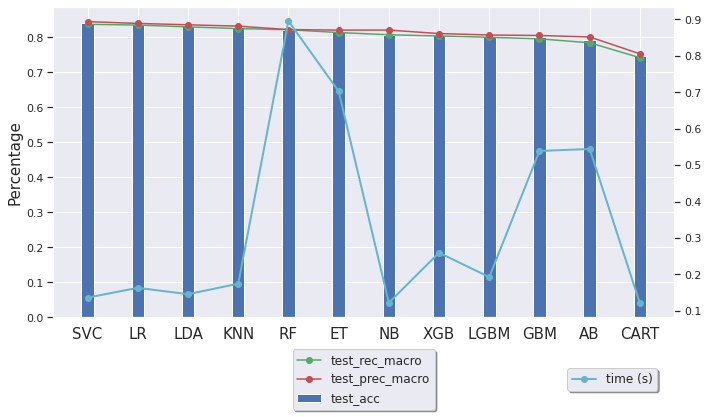

In [0]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

### Grid search Random forest

In [0]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      #('dimred', PCA()),
                           ('classifier',RandomForestClassifier(random_state=123))])
N_FEATURES_OPTIONS = [2, 4, 8,12]
param_grid = { 
    'classifier__n_estimators': [200, 500,1000],
    #'dimred__n_components':N_FEATURES_OPTIONS,
    #'classifier__max_features': ['auto', 'sqrt', 'log2'],
    #'classifier__max_depth' : [4,5,6,7,8],
    #'classifier__criterion' :['gini', 'entropy']
    }

gridRF=GridSearchCV(pipe,param_grid=param_grid,
        scoring='accuracy',cv=5)
gridRF = gridRF.fit(X_train, y_train)

In [0]:
# Printing the best score and best parameters
print("Best: %f using %s" % (gridRF.best_score_, 
    gridRF.best_params_))

Best: 0.816667 using {'classifier__n_estimators': 200}


In [0]:
# estimate accuracy on validation dataset
y_predict = gridRF.predict(X_test)
y_pred_probs = gridRF.predict_proba(X_test)[:, 1]
y_pred_bin = gridRF.predict(X_test)

In [0]:
confmat = confusion_matrix(y_test,y_predict)
print('accuracy_score: \n',accuracy_score(y_test, y_predict))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_predict))

accuracy_score: 
 0.8032786885245902
confusion_matrix 
 [[23  5]
 [ 7 26]]
classification_report 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



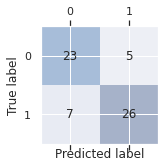

In [0]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

ROC Curve

ROC curves should be used when there are roughly equal numbers of observations for each class.

Precision-Recall curves should be used when there is a moderate to large class imbalance.

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict)

0.8046536796536796

AUC 0.8814935064935066


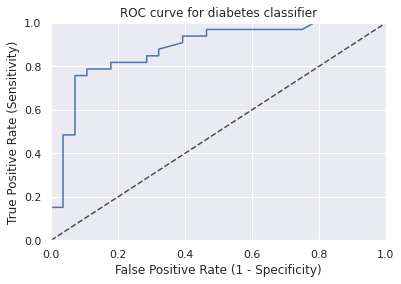

In [0]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
print('AUC',auc(fpr, tpr))
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# Type I error: False positive. if FP high so Type II will be decreased
# Type II error: False negative

In [0]:
ROC_df = pd.DataFrame([thresholds,fpr,tpr]).T
ROC_df.columns= ["thresholds ", "False positive", "True positive"]
ROC_df

,thresholds,False positive,True positive
0,2.000,0.000000,0.000000
1,1.000,0.000000,0.060606
2,0.970,0.000000,0.151515
3,0.965,0.035714,0.151515
4,0.930,0.035714,0.272727
5,0.925,0.035714,0.333333
6,0.820,0.035714,0.484848
7,0.815,0.071429,0.484848
8,0.640,0.071429,0.757576
9,0.625,0.107143,0.757576


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [0]:
auc(fpr, tpr)

0.8814935064935066

Precision Recall Curve

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

Precision:  It describes how good a model is at predicting the positive class. High precision mean false alarm (Type I error - false positive) will be low

Precision = True Positives / (True Positives + False Positives) FP:Negative but predict Positive

Recall: high recal mean miss rate (type II error - false negative) will be low

Recall = True Positives / (True Positives + False Negatives) FN: Positive but predict Negative

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [0]:
y_test

245    0
297    0
122    1
163    1
212    0
      ..
190    0
117    1
271    0
154    1
289    0
Name: target, Length: 61, dtype: int64

model: f1=0.812 auc=0.885


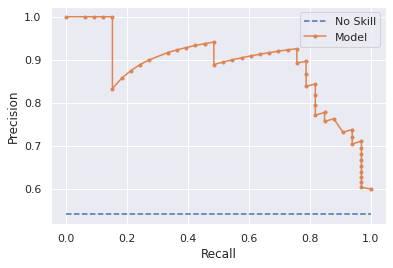

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# keep probabilities for the positive outcome only
y_pred_probs
# predict class values
y_predict

precision, recall, threshold = precision_recall_curve(y_test, y_pred_probs)
f1, auc = f1_score(y_test, y_predict), auc(recall, precision)
# summarize scores
print('model: f1=%.3f auc=%.3f' % (f1, auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Model')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
threshold.shape

(50,)

In [0]:
precision.shape

(51,)

In [0]:
Pre_Rec_df = pd.DataFrame([threshold,precision,recall]).T
Pre_Rec_df.columns= ["Thresholds", "Precision", "Recall"]
Pre_Rec_df
# If low thresholds: all sample will positive, no false negative so recall very high but precision very low
# if high thresholds: all sample will negative, no false positive so precision is very high

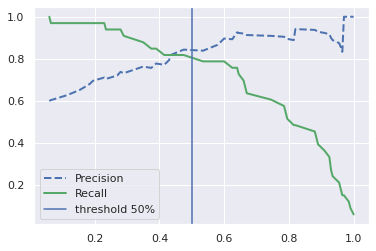

In [0]:
plt.plot(threshold, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(threshold, recall[:-1], "g-", label="Recall", linewidth=2)

plt.axvline(x=0.5,label="threshold 50%")

plt.legend()
plt.show()

In [0]:
print('classification_report \n',classification_report(y_test, y_predict))

classification_report 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



### Essemble learning chap 7

#### From Python 3 ML

In [0]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='classlabel')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        y : array-like, shape = [n_examples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_examples, n_classes]
            Weighted average probability for each class per example.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out

Using the majority voting principle to make predictions

In [0]:
clf1 = LogisticRegression()

clf2 = LinearDiscriminantAnalysis()

clf3 = RandomForestClassifier()

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'LinearDiscriminantAnalysis', 'RandomForestClassifier']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             #scoring='roc_auc',
                             scoring='accuracy'
                             )
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.84 (+/- 0.06) [Logistic regression]
Accuracy: 0.83 (+/- 0.08) [LinearDiscriminantAnalysis]
Accuracy: 0.80 (+/- 0.07) [RandomForestClassifier]


The result accuracy is very high after cross_val, it is dueto no one hot encoding category features, just standardScaler

In [0]:
# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(classifiers=[pipe1, pipe2, pipe3])

clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.84 (+/- 0.06) [Logistic regression]
Accuracy: 0.83 (+/- 0.08) [LinearDiscriminantAnalysis]
Accuracy: 0.82 (+/- 0.07) [RandomForestClassifier]
Accuracy: 0.82 (+/- 0.08) [Majority voting]


In [0]:
# Use the same method with Voting from DS workshop:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()

clf2 = LinearDiscriminantAnalysis()

clf3 = RandomForestClassifier()

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
estimators.append(('LR', pipe1))
estimators.append(('LDA', pipe2))
estimators.append(('RF', pipe3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.8291666666666668


Result voting from Workshop is 84%, < 92% from python ML 3 ?

Note: these method here is not using one hot encoder for object features

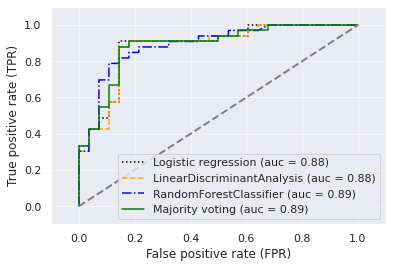

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('images/07_04', dpi=300)
plt.show()

In [0]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [0]:
print(X_train_std.shape)
print(y_train.shape)

(240, 13)
(240,)


In [0]:
mv_clf.get_params()

{'pipeline-1': Pipeline(memory=None,
          steps=[('sc',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ['clf',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False)]],
          verbose=False),
 'pipeline-1__clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
      

Evaluating and tuning the ensemble classifier (Majority voter classifier)

In [0]:
params = {
          'pipeline-3__clf__max_depth': [1, 3,5],
          'pipeline-1__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=mv_clf,
                    param_grid=params,
                    cv=10,
                    iid=False,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_['mean_test_score'][r], 
             grid.cv_results_['std_test_score'][r] / 2.0, 
             grid.cv_results_['params'][r]))

0.920 +/- 0.02 {'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__max_depth': 1}
0.918 +/- 0.02 {'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__max_depth': 3}
0.918 +/- 0.02 {'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__max_depth': 5}
0.916 +/- 0.02 {'pipeline-1__clf__C': 0.1, 'pipeline-3__clf__max_depth': 1}
0.919 +/- 0.02 {'pipeline-1__clf__C': 0.1, 'pipeline-3__clf__max_depth': 3}
0.921 +/- 0.02 {'pipeline-1__clf__C': 0.1, 'pipeline-3__clf__max_depth': 5}
0.920 +/- 0.02 {'pipeline-1__clf__C': 100.0, 'pipeline-3__clf__max_depth': 1}
0.919 +/- 0.02 {'pipeline-1__clf__C': 100.0, 'pipeline-3__clf__max_depth': 3}
0.918 +/- 0.02 {'pipeline-1__clf__C': 100.0, 'pipeline-3__clf__max_depth': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



In [0]:
params = {
          'pipeline-3__clf__max_depth': [3, 7,12],
          'pipeline-1__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=mv_clf,
                    param_grid=params,
                    cv=10,
                    iid=False,
                    scoring='accuracy')
grid.fit(X_train, y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_['mean_test_score'][r], 
             grid.cv_results_['std_test_score'][r] / 2.0, 
             grid.cv_results_['params'][r]))

0.838 +/- 0.04 {'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__max_depth': 3}
0.829 +/- 0.04 {'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__max_depth': 7}
0.833 +/- 0.04 {'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__max_depth': 12}
0.829 +/- 0.03 {'pipeline-1__clf__C': 0.1, 'pipeline-3__clf__max_depth': 3}
0.825 +/- 0.03 {'pipeline-1__clf__C': 0.1, 'pipeline-3__clf__max_depth': 7}
0.821 +/- 0.04 {'pipeline-1__clf__C': 0.1, 'pipeline-3__clf__max_depth': 12}
0.825 +/- 0.04 {'pipeline-1__clf__C': 100.0, 'pipeline-3__clf__max_depth': 3}
0.833 +/- 0.04 {'pipeline-1__clf__C': 100.0, 'pipeline-3__clf__max_depth': 7}
0.829 +/- 0.04 {'pipeline-1__clf__C': 100.0, 'pipeline-3__clf__max_depth': 12}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



In [0]:
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

Best parameters: {'pipeline-1__clf__C': 0.001, 'pipeline-3__clf__max_depth': 3}
Accuracy: 0.84


In [0]:
mv_clf = grid.best_estimator_

Bagging -- Building an ensemble of classifiers from bootstrap samples

In [0]:
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

tree = tree.fit(X_train_tran_df, y_train)
y_train_pred = tree.predict(X_train_tran_df)
y_test_pred = tree.predict(X_test_tran_df)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train_tran_df, y_train)
y_train_pred = bag.predict(X_train_tran_df)
y_test_pred = bag.predict(X_test_tran_df)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.738
Bagging train/test accuracies 1.000/0.803


Leveraging weak learners via adaptive boosting

In [0]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)



In [0]:
tree = tree.fit(X_train_tran_df, y_train)
y_train_pred = tree.predict(X_train_tran_df)
y_test_pred = tree.predict(X_test_tran_df)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train_tran_df, y_train)
y_train_pred = ada.predict(X_train_tran_df)
y_test_pred = ada.predict(X_test_tran_df)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.779/0.721
AdaBoost train/test accuracies 0.917/0.787


FROM DATA Science workshop and Jackson

#### Simple Methods for Ensemble Learning (from workshop and Jackson)

Create benmach:

In [0]:
# Prediction and accuracy metrics
model=LogisticRegression(random_state=123)

# Fitting the model using the meta learner
benchmarkModel = model.fit(X_train_tran_df, y_train)

# Predicting on the test set using the model
pred = benchmarkModel.predict(X_test_tran_df)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Averaging

Averaging is a naïve way of doing ensemble learning; however, it is extremely useful too.
The basic idea behind this technique is to take the predictions of multiple individual
models and then average the predictions to generate a final prediction. The assumption
is that by averaging the predictions of different individual learners, we eliminate the
errors made by individual learners, thereby generating a model superior to the base
model. One prerequisite to make averaging work is to have the predictions of the base
models be uncorrelated. This would mean that the individual models should not make
the same kinds of errors. The diversity of the models is a critical aspect to ensure
uncorrelated errors.

In [0]:
model1 = LogisticRegression(random_state=123)
model2 = KNeighborsClassifier(n_neighbors=5)
model3 = RandomForestClassifier(n_estimators=500)

model1.fit(X_train_tran_df,y_train)
model2.fit(X_train_tran_df,y_train)
model3.fit(X_train_tran_df,y_train)

# Predicting probabilities of each model on the test set
pred1=model1.predict_proba(X_test_tran_df)
pred2=model2.predict_proba(X_test_tran_df)
pred3=model3.predict_proba(X_test_tran_df)

# Calculating the ensemble prediction by averaging three base model prediction
ensemblepred=(pred1+pred2+pred3)/3

# Displaying first 4 rows of the ensemble predictions
ensemblepred[0:4,:]

array([[0.55479892, 0.44520108],
       [0.82762996, 0.17237004],
       [0.01710975, 0.98289025],
       [0.13398572, 0.86601428]])

In [0]:
# Printing the order of classes for each model
print(model1.classes_)
print(model2.classes_)
print(model3.classes_)

[0 1]
[0 1]
[0 1]


In [0]:
import numpy as np
pred = np.argmax(ensemblepred,axis = 1)
pred
#From the preceding code, axis = 1 means that we need to find the index of the
#maximum value across the columns.

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [0]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Weighted Averaging

Weighted averaging is an extension of the averaging method that we saw earlier. The
major difference in both of these approaches is in the way the combined predictions
are generated. In the weighted averaging method, we assign weights to each model's
predictions and then generate the combined predictions. The weights are assigned
based on our judgment of which model would be the most influential in the ensemble.
These weights, which are initially assigned arbitrarily, have to be evolved after a lot of
experimentation. To start off, we assume some weights and then iterate with different
weights for each model to verify whether we get any improvements in the performance
Let's implement the weighted averaging method in the upcoming exercise.

In [0]:
# Calculating the ensemble prediction by applying weights for each prediction
ensemblepred=(pred1 *0.60 + pred2 * 0.20 + pred3 * 0.20)
pred = np.argmax(ensemblepred,axis = 1)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [0]:
ensemblepred=(pred1 *0.70 + pred2 * 0.15 + pred3 * 0.15)
pred = np.argmax(ensemblepred,axis = 1)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#### Bagging

15.2 Bagging Algorithms
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The final output prediction is averaged
across the predictions of all of the sub-models. The three bagging models covered in this section
are as follows:

 Bagged Decision Trees.

 Random Forest.

 Extra Trees.

• base_estimator: This argument is to define the base estimator to be used.

• n_estimator: This argument defines the number of base estimators that will be used
in the ensemble.

• max_samples: The maximum size of the bootstrapped sample for fitting the base
estimator is defined using this argument. This is represented as a proportion
(0.8, 0.7, and so on).

• max_features: When fitting multiple individual learners, it has been found that
randomly selecting the features to be used in each dataset results in superior
performance. The max_features argument indicates the number of features to be
used. For example, if there were 10 features in the dataset and the max_features
argument was to be defined as 0.8, then only 8 (0.8 x 10) features would be used to
fit a model using the base learner.

In [0]:
# Base learner: Logistic Regression from Data science workshop
from sklearn.linear_model import LogisticRegression

bl1 = LogisticRegression(random_state=123) 
# Creating the bagging meta learner

from sklearn.ensemble import BaggingClassifier

baggingLearner = BaggingClassifier(base_estimator=bl1, n_estimators=15, max_samples=0.7, max_features=0.8)

# Fitting the model using the meta learner
Bagging = baggingLearner.fit(X_train_tran_df, y_train)

# Predicting on the test set using the model
pred = Bagging.predict(X_test_tran_df)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [0]:
# From Jakson: 
#Base learner: Decision Tree
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
num_trees = 100
cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train_tran_df, y_train, cv=kfold)
print('cross val score: ',results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



cross val score:  0.7708333333333333


In [0]:
# Base learner: Randomforest
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train_tran_df, y_train, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.8333333333333334


In [0]:
# Base learner: Extratree
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train_tran_df, y_train, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.8208333333333334


#### Boosting

Boosting

The bagging technique, which we discussed in the last section, can be termed as a
parallel learning technique. This means that each base learner is fit independently of
the other and their predictions are aggregated. Unlike the bagging method, boosting
works in a sequential manner. It works on the principle of correcting the prediction
errors of each base learner. The base learners are fit sequentially one after the other.
A base learner tries to correct the error generated by the previous learner and this
process continues until a superior meta learner is created. The steps involved in the
boosting technique are as follows:

1. A base learner is fit on a subset of the dataset.
2. Once the model is fit, predictions are made on the entire dataset.
3. The errors in the predictions are identified by comparing them with the
actual labels.
4. Those examples that generated the wrong predictions are given larger weights.
5. Another base learner is fit on the dataset where the weights of the wrongly
predicted examples in the previous step are altered.
6. This base learner tries to correct the errors of the earlier model and gives
their predictions.
7. Steps 4, 5, and 6 are repeated until a strong meta learner is generated.

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a final
output prediction. The two most common boosting ensemble machine learning algorithms are:

 AdaBoost.

 Stochastic Gradient Boosting.

1. AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works
by weighting instances in the dataset by how easy or difficult they are to classify, allowing
the algorithm to pay or less attention to them in the construction of subsequent models. You
can construct an AdaBoost model for classification using the AdaBoostClassifier class4. The
example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost
algorithm.

In [0]:
# Defining the base learner (from Data science workshop)

bl1 = LogisticRegression(random_state=123)

# Defining the boosting meta learner
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(base_estimator=bl1, n_estimators=300)

# Fitting the model on the training set
Boosting = boosting.fit(X_train_tran_df, y_train)

# Getting the predictions from the boosting model
pred = Boosting.predict(X_test_tran_df)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [0]:
# From Jackson:
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train_tran_df, y_train, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.8291666666666666


2. Stochastic Gradient Boosting

Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles. You can construct a
Gradient Boosting model for classification using the GradientBoostingClassifier class5. The
example below demonstrates Stochastic Gradient Boosting for classification with 100 trees.

In [0]:
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train_tran_df, y_train, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.7833333333333334


#### Voting esemble

Max Voting : 
The max voting method works on the principle of majority rule. In this method, the
opinion of the majority rules the roost. In this technique, individual models, or, in
ensemble learning jargon, individual learners, are fit on the training set and their
predictions are then generated on the test set. Each individual learner's prediction is
considered to be a vote. On the test set, whichever class gets the maximum vote is the
ultimate winner. Let's demonstrate this with a toy example.

In [0]:
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_tran_df, y_train, cv=kfold)
print(results.mean())

0.8291666666666668


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



#### Stacking

Stacking from DS workshop

In [0]:
# Importing the meta learner and base learners
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

bl1 = KNeighborsClassifier(n_neighbors=5)
bl2 = LogisticRegression(random_state=123) 
ml = RandomForestClassifier(random_state=123)

# Creating the stacking classifier
from mlxtend.classifier import StackingClassifier
stackclf = StackingClassifier(classifiers=[bl1, bl2], 
                          meta_classifier=ml)
# Fitting the model on the training set
Stackclf = stackclf.fit(X_train_tran_df, y_train)

# Getting the predictions from the boosting model
pred = Stackclf.predict(X_test_tran_df)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



Stacking from Jackson (website)

In [0]:
# get a list of models to evaluate
from sklearn.model_selection import RepeatedStratifiedKFold
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_tran_df, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison

>lr 0.831 (0.097)
>knn 0.814 (0.068)
>cart 0.714 (0.100)
>svm 0.829 (0.086)
>bayes 0.807 (0.117)


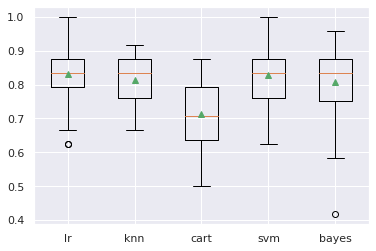

In [0]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>lr 0.835 (0.075)
>knn 0.650 (0.063)
>cart 0.754 (0.070)
>svm 0.648 (0.064)
>bayes 0.816 (0.074)
>stacking 0.829 (0.068)


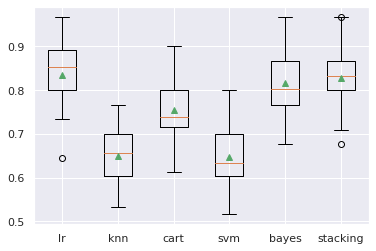

In [0]:
# get a stacking ensemble of models
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Deep learning

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import random

#Load Keras and sklearn
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation

from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

Base with Stacking: 0.85
Normal cross check: 0.83

Build model style Jason (Just for reference)

In [0]:
def plot_loss_accuracy_train(model):
  # plot training error and test error
  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(model.history['loss'],label='train loss')
  ax2.plot(model.history['accuracy'],label='train accuracy')

  ax1.set(xlabel='epoch', ylabel='loss')
  ax1.legend()

  ax2.set(xlabel='epoch', ylabel='accuracy')
  ax2.set_ylim([0, 1])
  ax2.legend()
  plt.tight_layout()
  #plt.legend(['train loss', 'validation loss','train_accuracy','val_accuracy'], loc='lower right')



In [0]:
def create_baseline():
  model = Sequential()
  model.add(Dense(10, input_dim=X_train_tran_df.shape[1], activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
# define a seed for random number generator so the result will be reproducible
seed=7
np.random.seed(seed)
random.set_seed(seed)

#Pipeline
estimators = []
estimators.append(( 'preprocessor' , preprocessor))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, nb_epoch=200,
batch_size=20, verbose=0)))
pipeline = Pipeline(estimators)

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)]

# train the model using training set while evaluating on test set
result=pipeline.fit(X_train, y_train 
                    #callbacks=callbacks,
                    #validation_data=(X_test_tran_df, y_test), shuffle=False
)
# Result:
a=result.named_steps['mlp'].model.history
#print("Best Accuracy on Validation Set =", max(a.history['val_accuracy']))
print("Best Accuracy on Train Set =", max(a.history['accuracy']))
#print("Best Loss on Validation Set =", min(a.history['val_loss']))
print("Best Loss on Train Set =", min(a.history['loss']))

Best Accuracy on Train Set = 0.57916665
Best Loss on Train Set = 0.6732126176357269


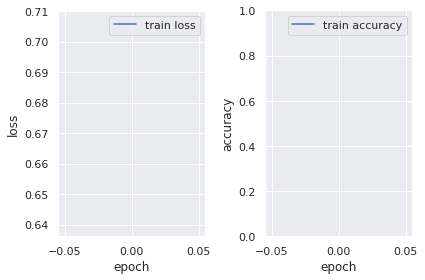

In [0]:
plot_loss_accuracy_train(result.named_steps['mlp'].model.history)

Build model style Keras workshop

In [0]:
def plot_loss_accuracy(model):
  # plot training error and test error
  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(model.history['loss'],label='train loss')
  ax1.plot(model.history['val_loss'],label='validation loss')
  ax2.plot(model.history['accuracy'],label='train accuracy')
  ax2.plot(model.history['val_accuracy'],label='validation accuracy')

  ax1.set(xlabel='epoch', ylabel='loss')
  ax1.legend()

  ax2.set(xlabel='epoch', ylabel='accuracy')
  ax2.set_ylim([0, 1])
  ax2.legend()
  plt.tight_layout()
  #plt.legend(['train loss', 'validation loss','train_accuracy','val_accuracy'], loc='lower right')



In [0]:
# define a seed for random number generator so the result will be reproducible
seed=7
np.random.seed(seed)
random.set_seed(seed)

# define the keras model
model_1 = Sequential()
model_1.add(Dense(10, input_dim=X_train_tran_df.shape[1], activation='relu'))
model_1.add(Dense(6, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model_1.summary()

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)]

# train the model using training set while evaluating on test set
history=model_1.fit(X_train_tran_df, y_train, batch_size = 20, epochs = 300, 
                    callbacks=callbacks,
                    validation_data=(X_test_tran_df, y_test), verbose=0, shuffle=False)

# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))
print("Best Accuracy on Train Set =", max(history.history['accuracy']))
print("Best Loss on Validation Set =", min(history.history['val_loss']))
print("Best Loss on Train Set =", min(history.history['loss']))


Best Accuracy on Validation Set = 0.8360655903816223
Best Accuracy on Train Set = 0.87083334
Best Loss on Validation Set = 0.49157924278349174
Best Loss on Train Set = 0.31351348136862117


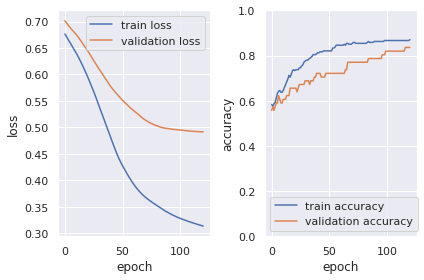

In [0]:
plot_loss_accuracy(history)

DL 2: L1, L2

In [0]:
seed=7
np.random.seed(seed)
random.set_seed(seed)

# define the keras model with l1_l2 regularization with l1_lambda = 0.005 and l2_lambda = 0.005
l1_param = 0.005
l2_param = 0.005
model_1 = Sequential()
model_1.add(Dense(10, input_dim=X_train_tran_df.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_1.add(Dense(6, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_1.add(Dense(4, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)]

# train the model using training set while evaluating on test set
history=model_1.fit(X_train_tran_df, y_train, batch_size = 20, epochs = 500, 
                    callbacks=callbacks,
                    validation_data=(X_test_tran_df, y_test), verbose=0, shuffle=False)

# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))
print("Best Accuracy on Train Set =", max(history.history['accuracy']))
print("Best Loss on Validation Set =", min(history.history['val_loss']))
print("Best Loss on Train Set =", min(history.history['loss']))

Best Accuracy on Validation Set = 0.8524590134620667
Best Accuracy on Train Set = 0.87083334
Best Loss on Validation Set = 0.5406580665072457
Best Loss on Train Set = 0.3940152923266093


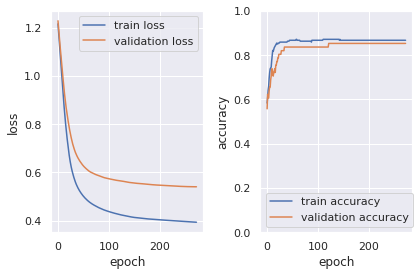

In [0]:
plot_loss_accuracy(history)

In [0]:
seed=7
np.random.seed(seed)
random.set_seed(seed)

# define the keras model with l1_l2 regularization with l1_lambda = 0.005 and l2_lambda = 0.005
l1_param = 0.005
l2_param = 0.005
model_1 = Sequential()
model_1.add(Dense(50, input_dim=X_train_tran_df.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
#model.add(BatchNormalization())
model_1.add(Dense(20, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_1.add(Dense(5, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)]

# train the model using training set while evaluating on test set
history=model_1.fit(X_train_tran_df, y_train, batch_size = 20, epochs = 500, 
                    callbacks=callbacks,
                    validation_data=(X_test_tran_df, y_test), verbose=0, shuffle=False)

# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))
print("Best Accuracy on Train Set =", max(history.history['accuracy']))
print("Best Loss on Validation Set =", min(history.history['val_loss']))
print("Best Loss on Train Set =", min(history.history['loss']))

Best Accuracy on Validation Set = 0.868852436542511
Best Accuracy on Train Set = 0.8833333
Best Loss on Validation Set = 0.5560764628844183
Best Loss on Train Set = 0.3866053658227126


Drop out

In [0]:
seed=7
np.random.seed(seed)
random.set_seed(seed)

# define the keras model
model_1 = Sequential()
model_1.add(Dense(10, input_dim=X_train_tran_df.shape[1], activation='relu')) #relu
#model.add(BatchNormalization())
model_1.add(Dropout(0.2))
model_1.add(Dense(6, activation='relu'))#relu
model_1.add(Dense(4, activation='relu'))#relu
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#optimizer: adam

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)]

# train the model using training set while evaluating on test set
history=model_1.fit(X_train_tran_df, y_train, batch_size = 20, epochs = 500, 
                    callbacks=callbacks,
                    validation_data=(X_test_tran_df, y_test), verbose=0, shuffle=False)

# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))
print("Best Accuracy on Train Set =", max(history.history['accuracy']))
print("Best Loss on Validation Set =", min(history.history['val_loss']))
print("Best Loss on Train Set =", min(history.history['loss']))

Best Accuracy on Validation Set = 0.868852436542511
Best Accuracy on Train Set = 0.8625
Best Loss on Validation Set = 0.41437888328657774
Best Loss on Train Set = 0.3668051523466905


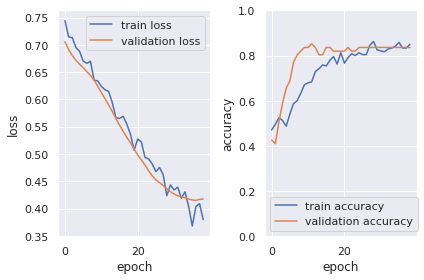

In [0]:
plot_loss_accuracy(history)

#### From Packt TF 2

In [0]:
# network and training
EPOCHS = 200
BATCH_SIZE = 10
VERBOSE = 0
NB_CLASSES = 1   # number of outputs = number of digits
N_HIDDEN = 10
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.2
# define the keras model with l1_l2 regularization with l1_lambda = 0.005 and l2_lambda = 0.005
l1_param = 0.005
l2_param = 0.005

In [0]:

#build the model
#----input-------#
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(10,
   		input_dim=X_train_tran_df.shape[1],
      activation='relu',kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
#----hiden layer-------#
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(6,
          activation='relu',kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(4,
   		    activation='relu',kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model.add(keras.layers.Dropout(DROPOUT))
#----output-------#
model.add(keras.layers.Dense(1,activation='sigmoid'))  #or softmax

# compiling the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)]
#training the moodel
model.fit(X_train_tran_df, y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
    #callbacks=callbacks,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

#evalute the model
test_loss, test_acc = model.evaluate(X_test_tran_df, y_test)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.8689
Test accuracy: 0.868852436542511


In [0]:
# making prediction
predictions = model.predict(X_test_tran_df)
predictions[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

#### From Hands on ML

In [0]:
print(X_train_tran_df.shape)
print(X_test_tran_df.shape)

(240, 25)
(61, 25)


In [0]:
X_train1,X_valid1= X_train_tran_df[:200], X_train_tran_df[200:]
y_train1,y_valid1 = y_train[:200], y_train[200:]

In [0]:
tf.random.set_seed(42)
np.random.seed(42)

# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=X_train_tran_df.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [0]:
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)]

history = model.fit(X_train1, y_train1, epochs=300,
                    callbacks=callbacks,verbose=0,
                    validation_data=(X_valid1, y_valid1))
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))
print("Best Accuracy on Train Set =", max(history.history['accuracy']))
print("Best Loss on Validation Set =", min(history.history['val_loss']))
print("Best Loss on Train Set =", min(history.history['loss']))

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning:

TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Best Accuracy on Validation Set = 0.925000011920929
Best Accuracy on Train Set = 0.795
Best Loss on Validation Set = 0.41252480149269105
Best Loss on Train Set = 0.5016455054283142


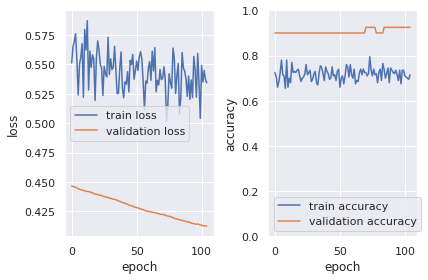

In [0]:
plot_loss_accuracy(history)

In [0]:
#evalute the model
test_loss, test_acc = model.evaluate(X_test_tran_df, y_test)
print('Test accuracy:', test_acc)

61/61 [==============================] - 0s 76us/step
Test accuracy: 0.7868852615356445


In [0]:
# making prediction
predictions = model.predict(X_test_tran_df)
predictions[:5]

array([[0.56586266],
       [0.4024466 ],
       [0.7827709 ],
       [0.48378387],
       [0.52562463]], dtype=float32)

### Diagnosing bias and variance problems with learning curves

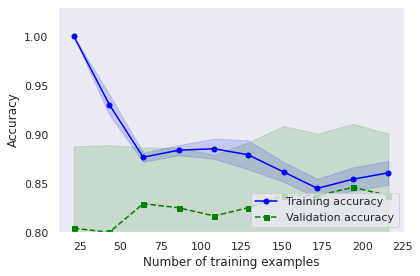

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

Addressing over- and underfitting with validation curves

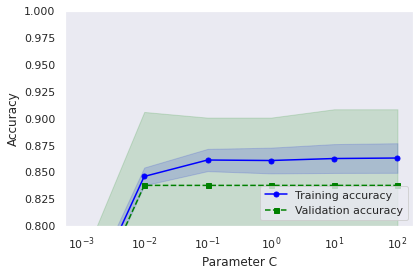

In [0]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

### Logistic regression and Grid Search

In [0]:
# Creating a pipeline with Logistic Regression

#N_FEATURES_OPTIONS = [2, 4, 8,12]
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      #('dimred', PCA()),
                           ('classifier',LogisticRegression(random_state=123))])

param_grid =  {#'dimred__n_components':N_FEATURES_OPTIONS,
               'classifier__penalty' : ['l1', 'l2'],
               'classifier__C' : [1,3, 5],
               'classifier__solver' : ['liblinear']}

gridLR=GridSearchCV(pipe,param_grid=param_grid,
        scoring='accuracy',cv=5)
gridLR = gridLR.fit(X_train, y_train)
    

In [0]:
# Printing the best score and best parameters
print("Best: %f using %s" % (gridLR.best_score_, 
    gridLR.best_params_))

Best: 0.850000 using {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [0]:
# estimate accuracy on validation dataset
predictions = gridLR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.819672131147541
[[24  4]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Algorithm selection with nested cross-validation

In [0]:
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      #('dimred', PCA()),
                           ('classifier',LogisticRegression(random_state=123))])

param_grid_lr =  {#'dimred__n_components':N_FEATURES_OPTIONS,
               'classifier__penalty' : ['l1', 'l2'],
               'classifier__C' : [1,3, 5],
               'classifier__solver' : ['liblinear']}

In [0]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_grid_svc = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

In [0]:
gs = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid_lr,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.842 +/- 0.065


In [0]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid_svc,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.817 +/- 0.071


The returned average cross-validation accuracy gives us a good estimate of what to
expect if we tune the hyperparameters of a model and use it on unseen data.

### The Explanation

#### Feature important

In [0]:
imp_vals=gridRF.best_estimator_.named_steps["classifier"].feature_importances_
imp_vals

array([0.07560935, 0.06758772, 0.06561641, 0.10828965, 0.10827199,
       0.07015286, 0.01611775, 0.01887182, 0.0573955 , 0.00698065,
       0.0153876 , 0.01105552, 0.00721462, 0.00837139, 0.01245205,
       0.01561354, 0.00030763, 0.03390135, 0.03580751, 0.00438213,
       0.02833225, 0.02528969, 0.00484796, 0.10563475, 0.09650833])

In [0]:
varimp_grid_df=pd.DataFrame({'feature': X_train_tran_df.columns, 'importance': imp_vals})
varimp_grid_df=varimp_grid_df.sort_values(by='importance',ascending=False)
varimp_grid_df.head(10)

,feature,importance
3,max_heart_rate_achieved,0.108290
4,st_depression,0.108272
23,thalassemia_2,0.105635
24,thalassemia_3,0.096508
0,age,0.075609
5,num_major_vessels,0.070153
1,resting_blood_pressure,0.067588
2,cholesterol,0.065616
8,chest_pain_type_0,0.057395
18,exercise_induced_angina_1,0.035808


In [0]:
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [0]:
dt_column_tran=pd.concat([X_train_tran_df,y_train],axis=1)
print(X_train_tran_df.shape)
print(dt_column_tran.shape)
dt_column_tran.head()

(240, 25)
(240, 26)


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting electrocardiographic_0,resting electrocardiographic_1,resting electrocardiographic_2,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_0,st_slope_1,st_slope_2,thalassemia_1,thalassemia_2,thalassemia_3,target
0,0.613698,1.038463,-0.076199,0.953134,-0.116249,-0.69768,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,-0.048268,-0.004830,0.911222,0.412349,-0.888858,0.33592,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,1.165336,-0.700359,-1.372190,-0.443895,-0.545476,-0.69768,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,-0.489579,-0.700359,-0.508196,0.367283,0.484669,-0.69768,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,-1.372201,-0.700359,-0.076199,1.989639,-0.202095,-0.69768,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


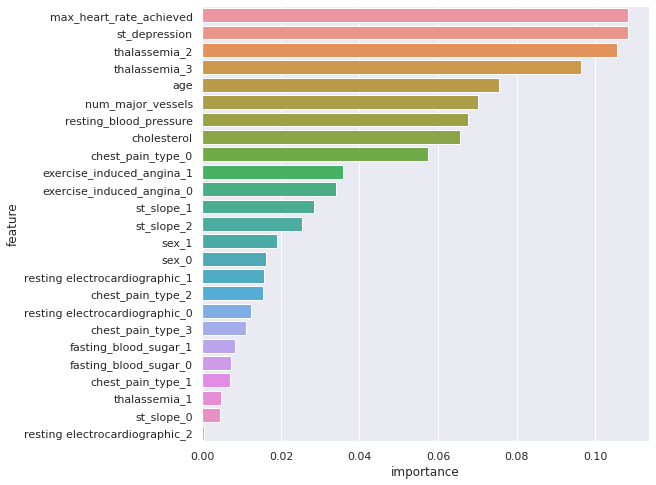

In [0]:
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(x='importance',y='feature',data=varimp_grid_df,ax=ax)
plt.show()

In [0]:
dt_column_tran.corr().sort_values(by='target',ascending=False)['target']

target                            1.000000
thalassemia_2                     0.554953
max_heart_rate_achieved           0.454313
exercise_induced_angina_0         0.437893
st_slope_2                        0.387377
sex_0                             0.308058
chest_pain_type_2                 0.261203
chest_pain_type_1                 0.250750
resting electrocardiographic_1    0.168144
chest_pain_type_3                 0.088754
fasting_blood_sugar_1             0.037748
resting electrocardiographic_2   -0.008439
fasting_blood_sugar_0            -0.037748
cholesterol                      -0.058402
st_slope_0                       -0.074347
thalassemia_1                    -0.075626
resting_blood_pressure           -0.128982
resting electrocardiographic_0   -0.166610
age                              -0.216337
sex_1                            -0.308058
st_slope_1                       -0.351509
num_major_vessels                -0.384265
exercise_induced_angina_1        -0.437893
st_depressi

In [0]:
df.corr().sort_values(by='target',ascending=False)['target']

target                          1.000000
chest_pain_type                 0.433798
max_heart_rate_achieved         0.421741
st_slope                        0.345877
resting electrocardiographic    0.137230
fasting_blood_sugar            -0.028046
cholesterol                    -0.085239
resting_blood_pressure         -0.144931
age                            -0.225439
sex                            -0.280937
thalassemia                    -0.344029
num_major_vessels              -0.391724
st_depression                  -0.430696
exercise_induced_angina        -0.436757
Name: target, dtype: float64

In [0]:
model=gridRF.best_estimator_
onehot_columns = list(model.named_steps['preprocessor'].named_transformers_['categoric'].\
                      named_steps['onehot'].get_feature_names(input_features=categorical_features))
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)
numeric_features_list

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'sex_0',
 'sex_1',
 'chest_pain_type_0',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'fasting_blood_sugar_0',
 'fasting_blood_sugar_1',
 'resting electrocardiographic_0',
 'resting electrocardiographic_1',
 'resting electrocardiographic_2',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'st_slope_0',
 'st_slope_1',
 'st_slope_2',
 'thalassemia_1',
 'thalassemia_2',
 'thalassemia_3']

In [0]:
import eli5
eli5.explain_weights(model.named_steps['classifier'], top=50, feature_names=numeric_features_list)

Weight,Feature
0.1083 ± 0.1509,max_heart_rate_achieved
0.1083 ± 0.1469,st_depression
0.1056 ± 0.2534,thalassemia_2
0.0965 ± 0.2304,thalassemia_3
0.0756 ± 0.0855,age
0.0702 ± 0.1120,num_major_vessels
0.0676 ± 0.0757,resting_blood_pressure
0.0656 ± 0.0694,cholesterol
0.0574 ± 0.1510,chest_pain_type_0
0.0358 ± 0.1236,exercise_induced_angina_1


#### Plot partial dependence

In [0]:
X_test.columns.get_loc('age')

0

In [0]:
n=len(X_test.columns)
n

13

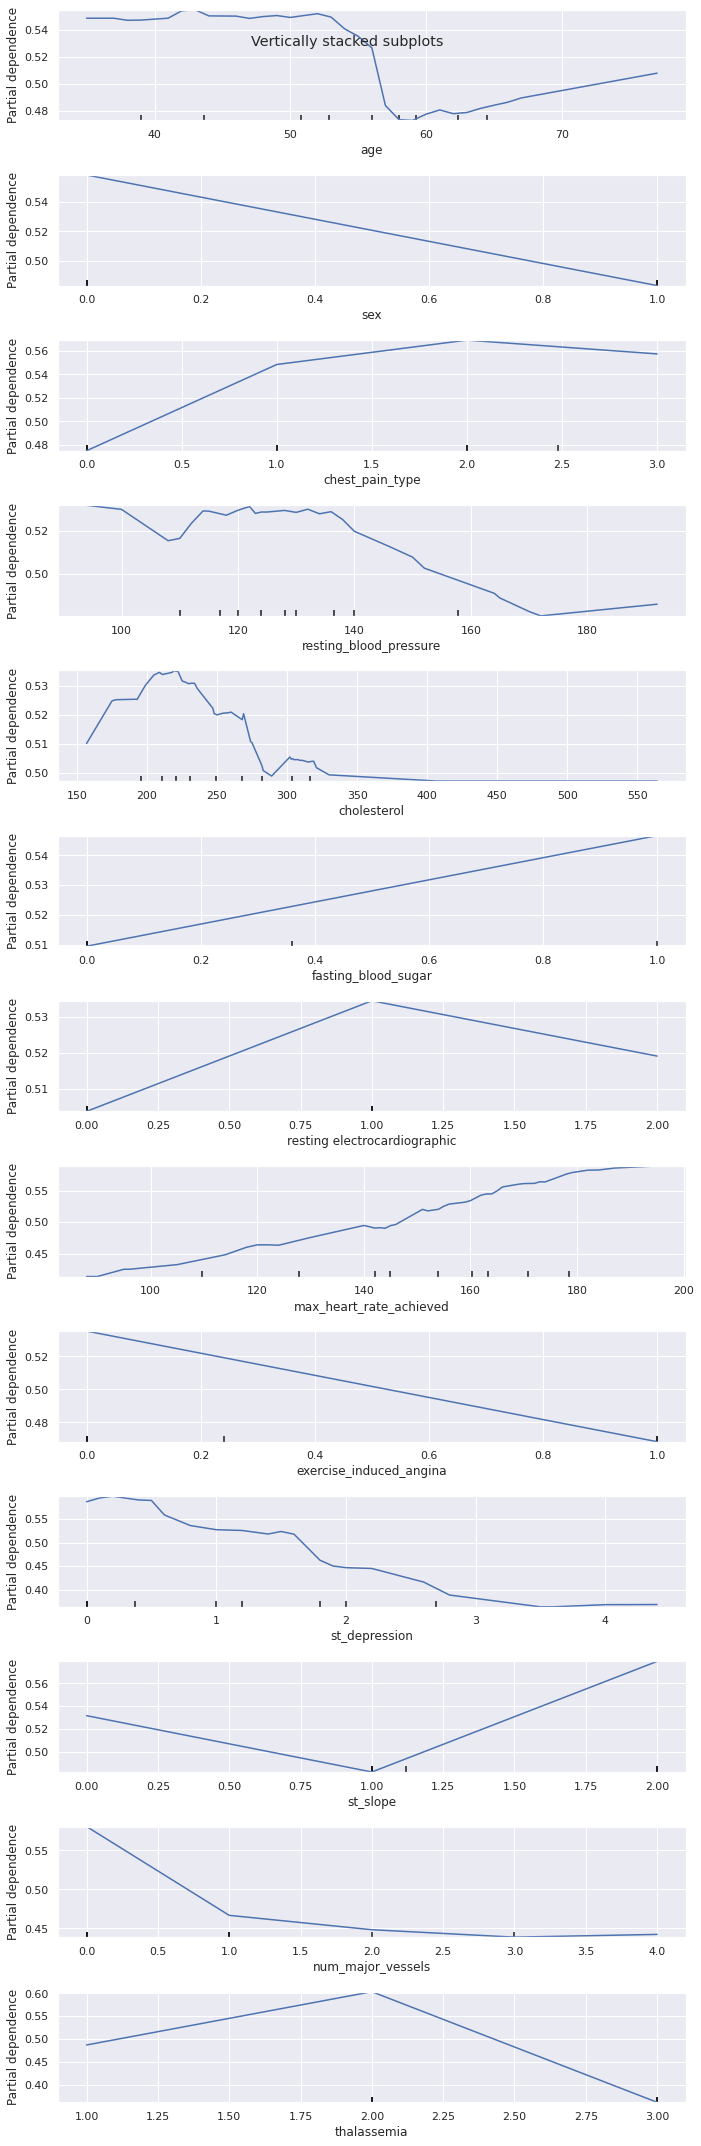

In [0]:
from sklearn.inspection import plot_partial_dependence


n=len(X_test.columns)
i=0
fig, ax = plt.subplots(n,figsize=(10,30))
fig.suptitle('Vertically stacked subplots')

for name in X_test.columns:
  features= [X_test.columns.get_loc(name)]
  plot_partial_dependence(gridRF,X_test, features=features,ax=ax[i])
  i+=1

plt.tight_layout()
plt.savefig('image.png')
plt.show()

#### Based on Kaggle

Partial Dependence Plots

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


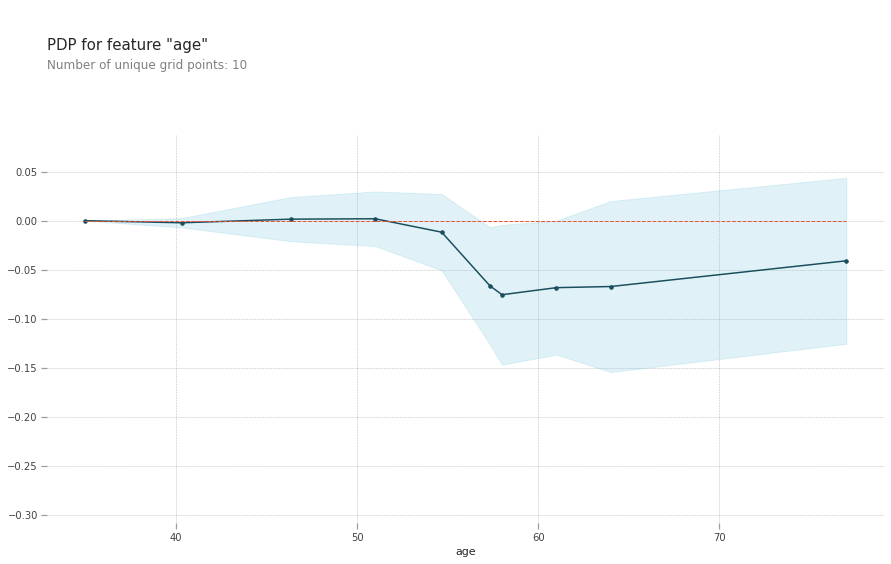

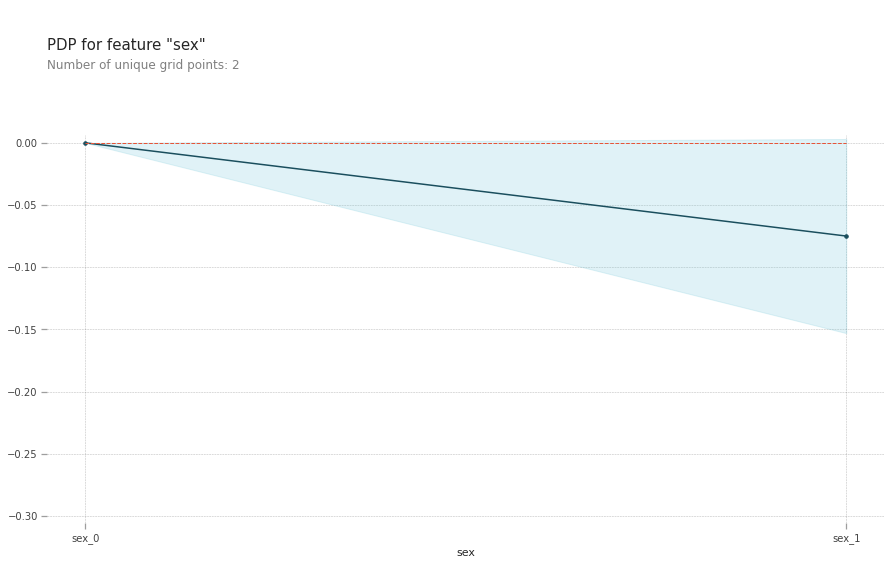

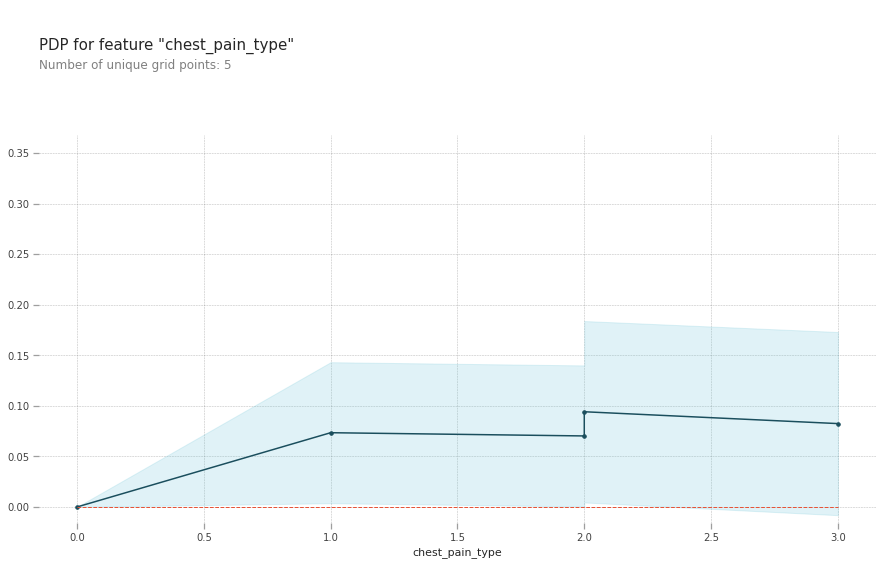

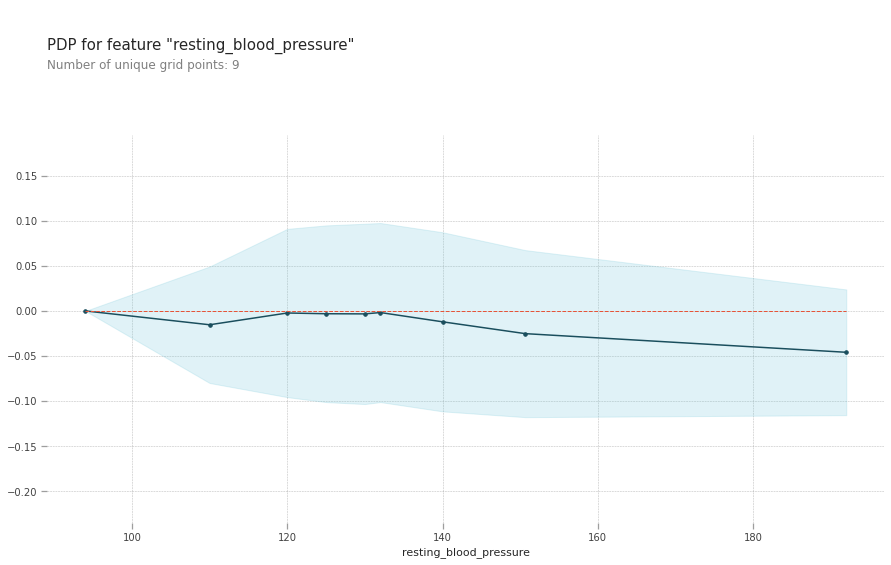

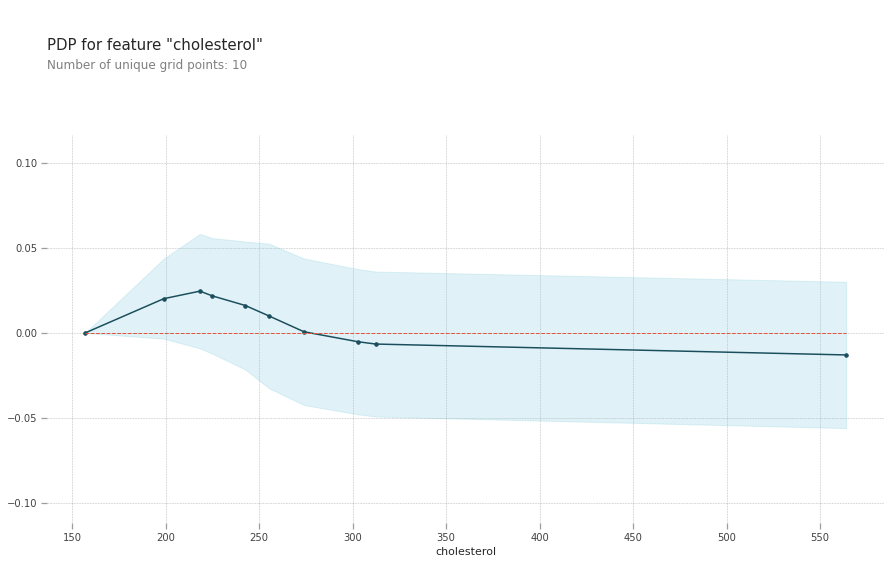

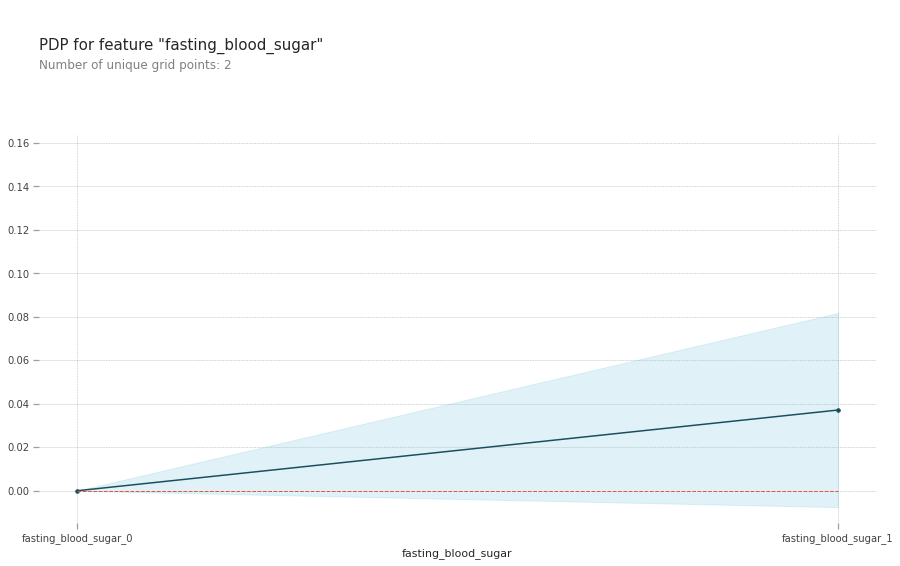

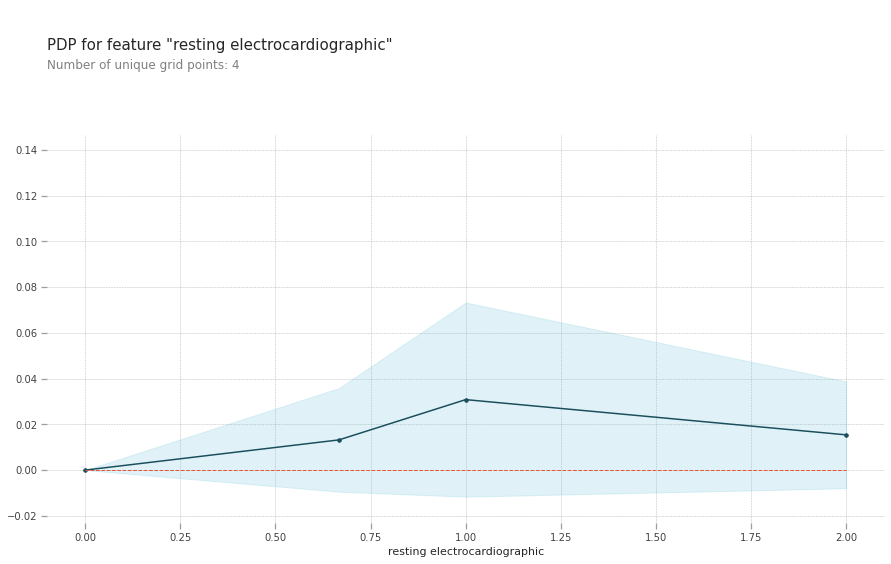

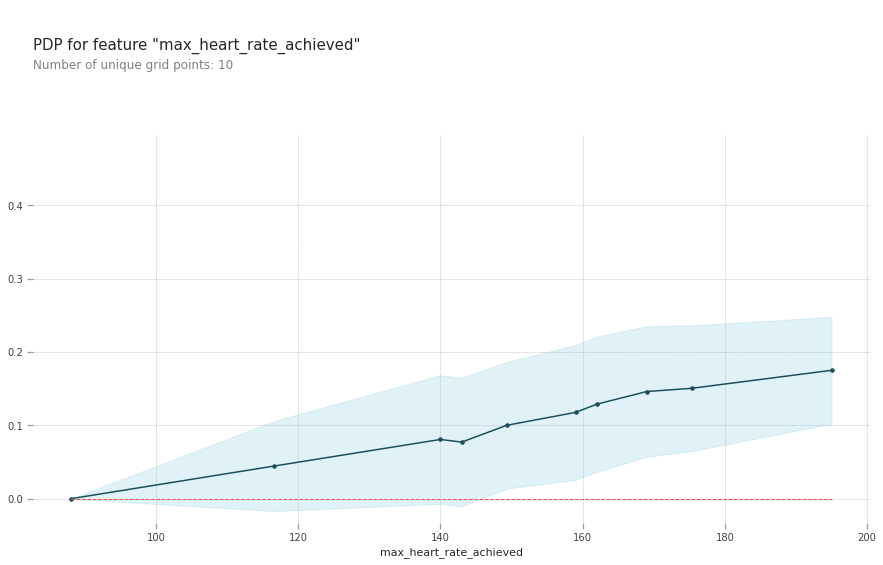

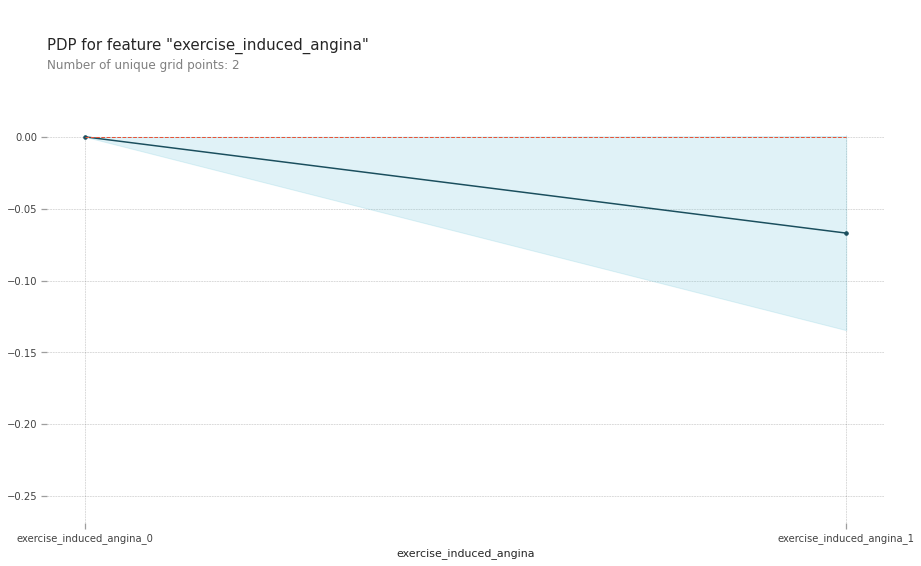

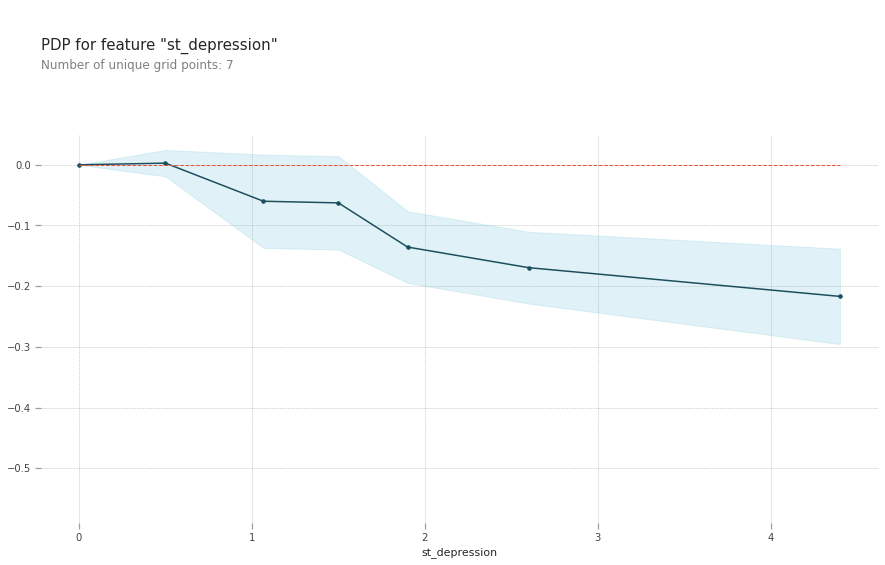

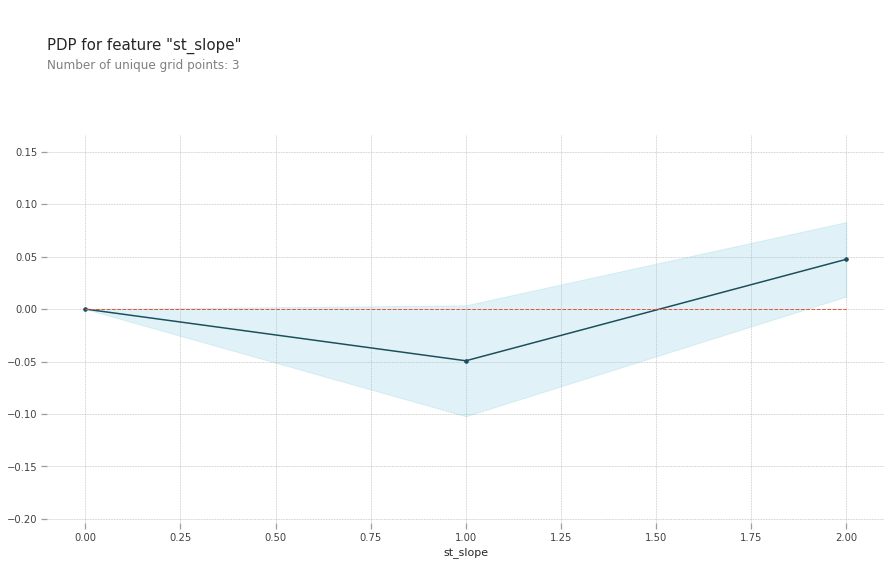

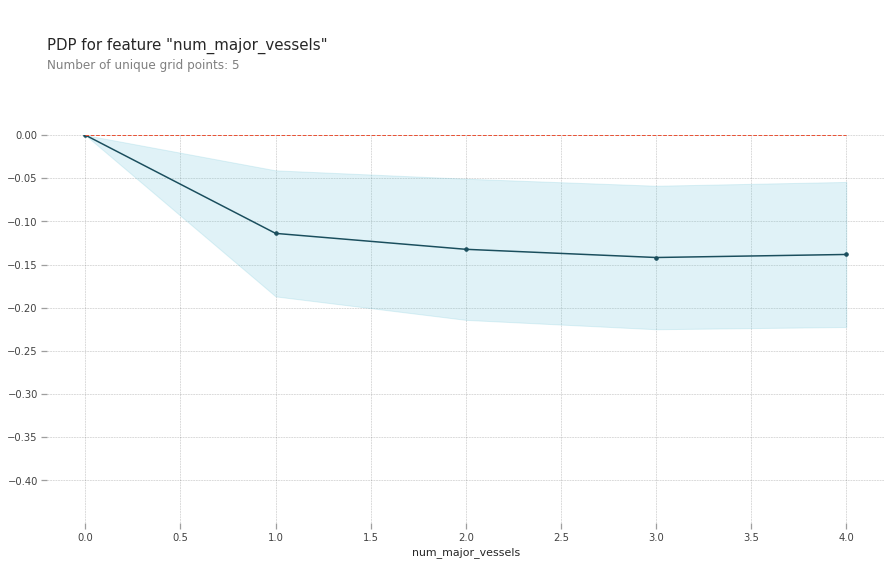

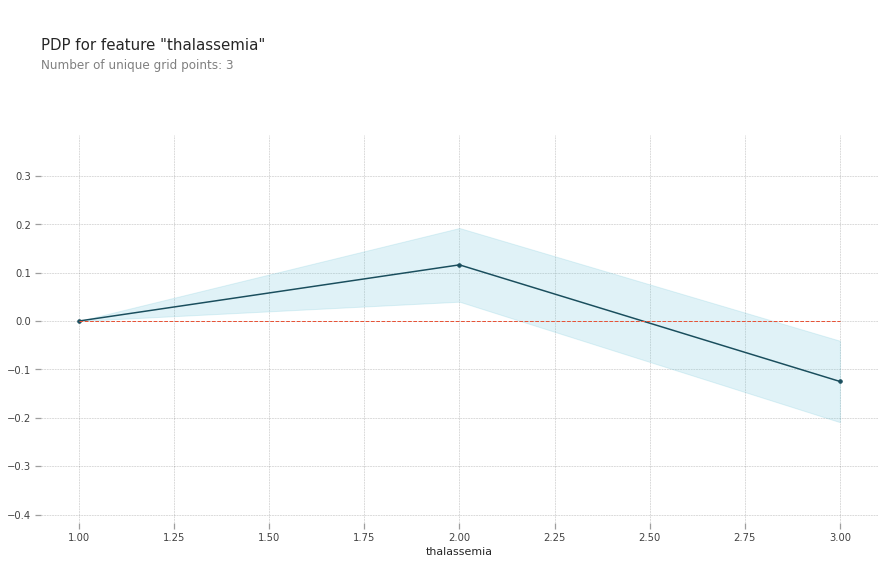

In [0]:
from pdpbox import pdp, info_plots #for partial plots

n=len(X_test.columns)
i=0
#fig, ax = plt.subplots(n,figsize=(10,30))
#fig.suptitle('Vertically stacked subplots')
base_features = X_train.columns.values.tolist()

for name in X_test.columns:
  feat_name = name
  pdp_dist = pdp.pdp_isolate(model=gridRF, dataset=X_test, model_features=base_features, feature=feat_name)
  pdp.pdp_plot(pdp_dist, feat_name)
  #i+=1

plt.tight_layout()
plt.savefig('image2.png')
plt.show()


In [0]:
X_train_tran_df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting electrocardiographic_0,resting electrocardiographic_1,resting electrocardiographic_2,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_0,st_slope_1,st_slope_2,thalassemia_1,thalassemia_2,thalassemia_3
0,0.613698,1.038463,-0.076199,0.953134,-0.116249,-0.69768,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.048268,-0.004830,0.911222,0.412349,-0.888858,0.33592,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.165336,-0.700359,-1.372190,-0.443895,-0.545476,-0.69768,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.489579,-0.700359,-0.508196,0.367283,0.484669,-0.69768,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.372201,-0.700359,-0.076199,1.989639,-0.202095,-0.69768,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Let's see what the SHAP values tell us. These work by showing the influence of the values of every variable in a single row, compared to their baseline values (learn more here).

In [0]:
!pip install shap
import shap

     |████████████████████████████████| 276kB 9.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394111 sha256=90566e49ac21b2f42136dfe981f174d2f615b2ad092d5433df6a7d34668a4b57
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
gridRF.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved',...
                 RandomForestClassifier(boo

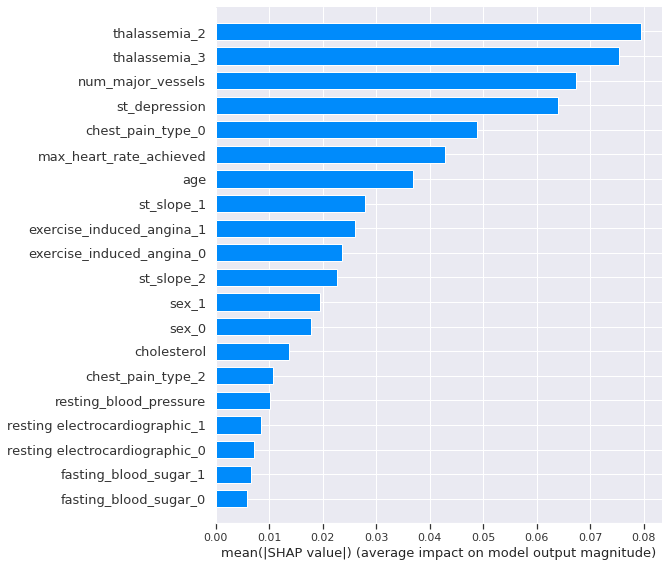

In [0]:
model = gridRF.best_estimator_.named_steps['classifier']
#model = RandomForestClassifier(max_depth=5)
#model.fit(X_train_tran_df, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_tran_df)

shap.summary_plot(shap_values[1], X_test_tran_df, plot_type="bar")

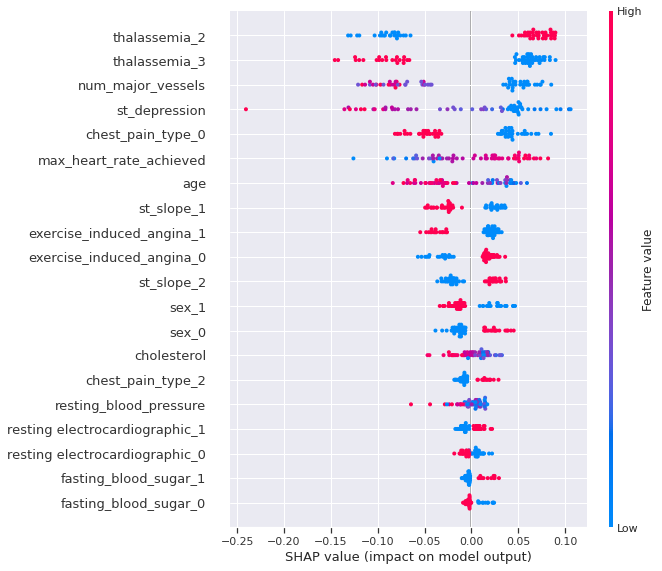

In [0]:
shap.summary_plot(shap_values[1], X_test_tran_df)

The number of major vessels division is pretty clear, and it's saying that low values are bad (blue on the right). The thalassemia 'reversable defect' division is very clear (yes = red = good, no = blue = bad).

You can see some clear separation in many of the other variables. Exercise induced angina has a clear separation, although not as expected, as 'no' (blue) increases the probability. Another clear one is the st_slope. It looks like when it's flat, that's a bad sign (red on the right).

It's also odd is that the men (red) have a reduced chance of heart disease in this model. Why is this? Domain knowledge tells us that men have a greater chance.

Next, let's pick out individual patients and see how the different variables are affecting their outcomes,

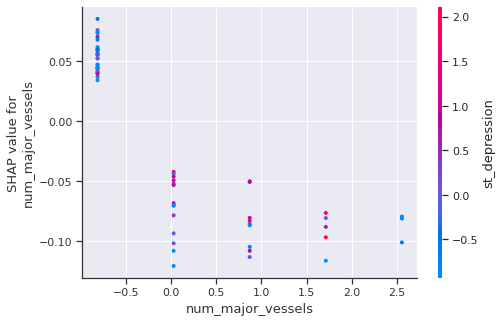

In [0]:
ax2 = fig.add_subplot(224)
shap.dependence_plot('num_major_vessels', shap_values[1], 
                     X_test_tran_df, interaction_index="st_depression")

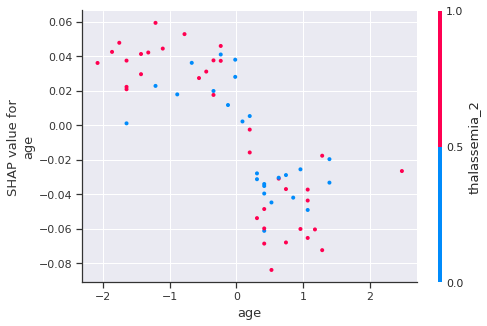

In [0]:
ax2 = fig.add_subplot(224)
shap.dependence_plot('age', shap_values[1], 
                     X_test_tran_df)

In [0]:
data_for_prediction = X_test_tran_df.iloc[1,:].astype(float)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

For this person, their prediction is 25%  - predict no disease (compared to a baseline of 54%). Many things are working in their favour, including having a major vessel, a reversible thalassemia defect, and not having a flat st_slope.

You can see the stark effect on the number of major vessels, but there doesn't seem to be a lot to take from the colour (st_depression).

The final plot, for me, is one of the most effective. It shows the predictions and influencing factors for many (in this case 50) patients, all together. It's also interactive, which is great. Hover over to see why each person ended up either red (prediction of disease) or blue (prediction of no disease),

In [0]:
#f = plt.figure()
shap_values = explainer.shap_values(X_train_tran_df.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], 
                X_test_tran_df.iloc[:50],show=False)
#f.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

In [0]:
data =  X_test[:20]
gridRF.best_estimator_.predict(data)

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [0]:
data_for_prediction = X_test_tran_df.iloc[1].astype(float)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)
#y_true=0 (more blue mean no disease)

In [0]:
data_for_prediction = X_test_tran_df.iloc[2].astype(float)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)
#y_true=1 (more red mean positive disease)

TypeError: ignored

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


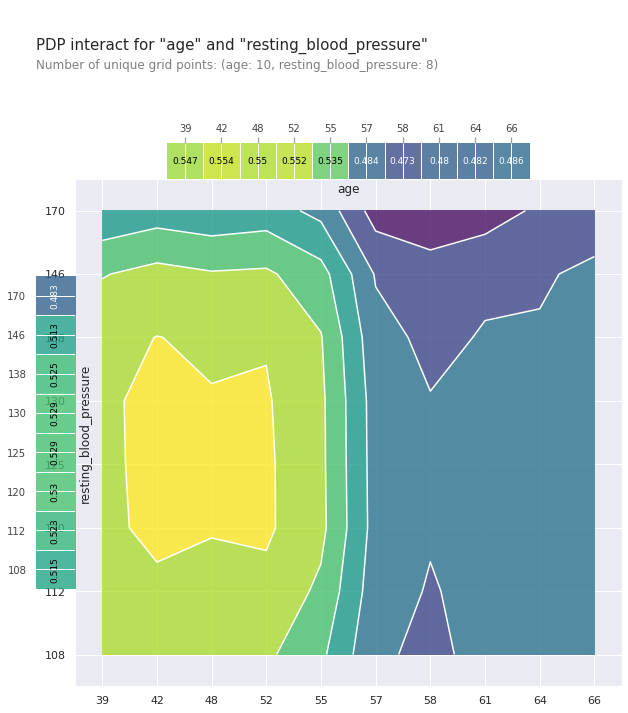

In [0]:
inter1 = pdp.pdp_interact(model=gridRF,
                          dataset=X_test,
                          model_features=base_features,
                          features=['age', 'resting_blood_pressure'],
                          num_grid_points=[10, 10],
                          percentile_ranges=[(5, 95), (5, 95)])
fig, axes = pdp.pdp_interact_plot(pdp_interact_out=inter1,
                                  feature_names=['age', 'resting_blood_pressure'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True)

Explain by LIME

In [0]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(X_train.values,
      feature_names=X_train.columns, 
      class_names=['1','0'],
      mode='classification')

In [0]:
exp = lime_explainer.explain_instance(X_test.values[1], gridRF.predict_proba,num_features=10)
exp.show_in_notebook()

In [0]:
from lime.lime_tabular import LimeTabularExplainer

In [0]:
lime_explainer = LimeTabularExplainer(X_train_tran_df.values,
      feature_names=X_train_tran_df.columns,
      class_names=['1','0'],
       mode='classification')

In [0]:
exp = lime_explainer.explain_instance(X_train_tran_df.values[1], gridRF.best_estimator_.predict)
exp.show_in_notebook()